# Loading in the libraries.

In [1]:
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import cluster, datasets
from sklearn.metrics import confusion_matrix, mean_squared_error
import matplotlib.pylab as py
from matplotlib.colors import ListedColormap
%matplotlib inline

import numpy as np

iris = datasets.load_iris()

## Decision Trees

In [2]:
# Get some reasonable names.
X = iris['data']
y = iris['target']

In [13]:
yHat = np.zeros([len(y)])

# Exists a separator
#yHat[np.logical_or(y==1,y==2)] = 1
# No perfect separator
yHat[np.logical_or(y==1,y==0)] = 1

In [14]:
# Now we do it for the real data.
pair = [0,1]
X_train,X_test,y_train,y_test = train_test_split(X[:,pair],
                                                 yHat,
                                                 test_size=0.5)

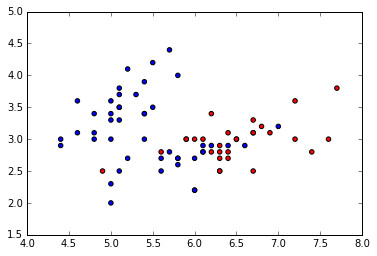

In [15]:
# Make a plot
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
py.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,marker='o')

In [25]:
# Run the classifier
clf = DecisionTreeClassifier(max_depth=10,random_state=1234).fit(X_train, y_train)

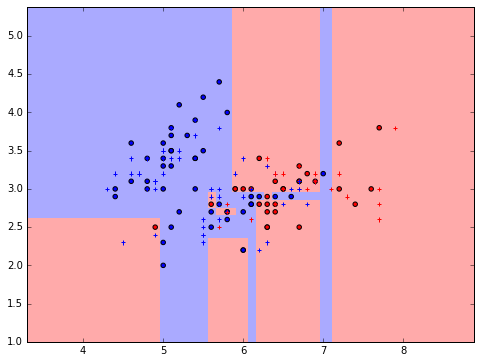

In [26]:
# Make some plots, inspired by scikit-learn tutorial

# step size in the mesh for plotting the decision boundary.
h = .02  
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
py.figure(1, figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
py.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
py.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,marker='o')
py.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold,marker='+')
py.xlim(xx.min(), xx.max())
py.ylim(yy.min(), yy.max())
py.show()

In [27]:
# Print out some metrics
print "Training scores"
print clf.score(X_train,y_train)
print "Testing scores"
print clf.score(X_test,y_test)

Training scores
0.933333333333
Testing scores
0.72


### Back to the notes.

## Regression Tree

In [28]:
# Create a random dataset.  Inspired by
# http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.5)

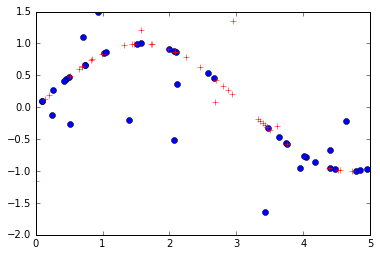

In [30]:
# Plot  the data
py.plot(X_train, y_train, 'bo')
py.plot(X_test, y_test, 'r+')

In [31]:
# Run the decision tree regression algorithm
reg = DecisionTreeRegressor(max_depth=5,random_state=1234).fit(X_train, y_train)

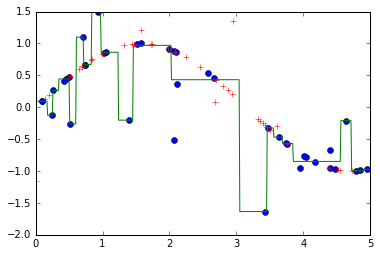

In [32]:
# Plot  the data
py.plot(X_train, y_train, 'bo')
py.plot(X_test, y_test, 'r+')
X_plot = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
py.plot(X_plot,reg.predict(np.sort(X_plot)),'g')

In [34]:
# Use the metrics package to print our errors
print 'training error'
print mean_squared_error(y_train,reg.predict(X_train))
print 'testing error'
print mean_squared_error(y_test,reg.predict(X_test))

training error
0.0347195221953
testing error
0.397522038348


### Back to the notes.

## Random Forest Classifier

In [35]:
# Get some reasonable names.
X = iris['data']
y = iris['target']

In [36]:
yHat = np.zeros([len(y)])

# Exists a separator
yHat[np.logical_or(y==1,y==2)] = 1
# No perfect separator
#yHat[np.logical_or(y==1,y==0)] = 1

In [37]:
# Now we do it for the real data.
pair = [0,1]
X_train,X_test,y_train,y_test = train_test_split(X[:,pair],
                                                 yHat,
                                                 test_size=0.5)

In [51]:
# Run the classifier, try 10, 20, and 100 estimators
clf = RandomForestClassifier(max_depth=4,n_estimators=20,random_state=1234).fit(X_train, y_train)

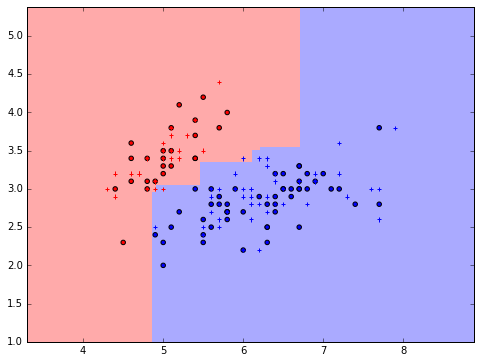

In [52]:
# Make some plots, inspired by scikit-learn tutorial

# step size in the mesh for plotting the decision boundary.
h = .02  
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
py.figure(1, figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
py.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
py.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,marker='o')
py.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold,marker='+')
py.xlim(xx.min(), xx.max())
py.ylim(yy.min(), yy.max())
py.show()

In [53]:
# Print out some metrics
print "Training scores"
print clf.score(X_train,y_train)
print "Testing scores"
print clf.score(X_test,y_test)

Training scores
1.0
Testing scores
0.973333333333


## Random Forest Regressor

In [35]:
# Create a random dataset.  Inspired by
# http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.5)

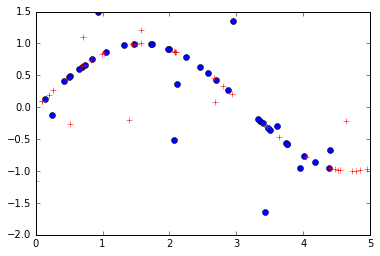

In [37]:
# Plot  the data
py.plot(X_train, y_train, 'bo')
py.plot(X_test, y_test, 'r+')

In [38]:
# Run the decision tree regression algorithm
reg = RandomForestRegressor(max_depth=1,n_estimators=100,random_state=1234).fit(X_train, y_train)

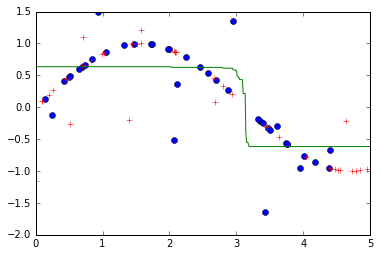

In [39]:
# Plot  the data
py.plot(X_train, y_train, 'bo')
py.plot(X_test, y_test, 'r+')
X_plot = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
py.plot(X_plot,reg.predict(np.sort(X_plot)),'g')

In [40]:
# Use the metrics package to print our errors
print 'training error'
print mean_squared_error(y_train,reg.predict(X_train))
print 'testing error'
print mean_squared_error(y_test,reg.predict(X_test))

training error
0.164379301106
testing error
0.227087831251


### Back to the notes.

## K-means

In [54]:
# Load in the data.
iris = datasets.load_iris()

In [55]:
# Get some reasonable names.
X = iris['data']
y = iris['target']

In [59]:
# Note, there is no test set here.   Why!?
# Bad projection
pair = [0,1]
# Good projection
#pair = [1,2]

Xtrain = X[:,pair]

In [60]:
# We make a K-means classifier
k_means = cluster.KMeans(n_clusters=3)
# and run it.  Note, "y" does not appear!  That is what makes it unsupervised.
k_means.fit(Xtrain)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

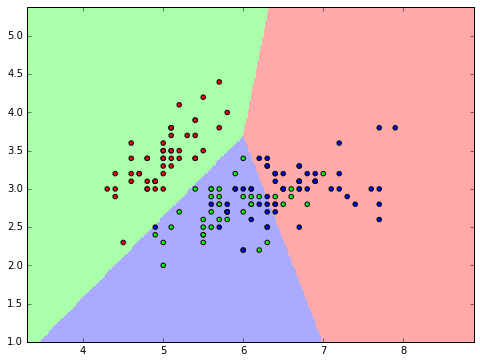

In [61]:
# Make some plots, inspired by scikit-learn tutorial

# step size in the mesh for plotting the decision boundary.
h = .02  
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = Xtrain[:, 0].min() - 1, Xtrain[:, 0].max() + 1
y_min, y_max = Xtrain[:, 1].min() - 1, Xtrain[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
py.figure(1, figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
py.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
py.scatter(Xtrain[:, 0], Xtrain[:, 1], c=y, cmap=cmap_bold,marker='o')
py.xlim(xx.min(), xx.max())
py.ylim(yy.min(), yy.max())
py.show()

In [62]:
# print out some scores
print confusion_matrix(y,k_means.predict(Xtrain))

[[ 0 50  0]
 [12  0 38]
 [35  0 15]]


In [63]:
# The true y
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [64]:
# Of course, the labels here need to be considered carefully!
k_means.predict(Xtrain)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

<b>Back to the notes.</b>

## Manifold learning

In [65]:
# Load in mayavi
import mayavi.mlab as mlab

In [66]:
# Load in the data
from sklearn import manifold, datasets
X, color = datasets.samples_generator.make_swiss_roll(n_samples=4000)

In [67]:
# Take a look at it
mlab.clf()
mlab.points3d(X[:, 0], X[:, 1], X[:, 2],mode='point')
mlab.axes()
mlab.show()

In [68]:
# Compute LLE
X_r, err = manifold.locally_linear_embedding(X, n_neighbors=10,
                                             n_components=2,method='ltsa')

In [69]:
# Look at the embedding
X_r[1:10,:]

array([[ 0.0096458 ,  0.00030322],
       [-0.00406384,  0.00891706],
       [-0.01417255,  0.0203004 ],
       [-0.00997081, -0.01130122],
       [ 0.01105055,  0.02057282],
       [ 0.02025372,  0.00567858],
       [ 0.00749502,  0.01821783],
       [-0.01839235,  0.00034735],
       [ 0.00950215,  0.00634468]])

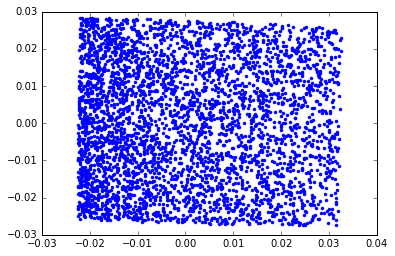

In [70]:
# The embedding
py.plot(X_r[:,0],X_r[:,1],'b.')

In [71]:
m = {'X1':'petal width','X2':'sepal width'}


In [72]:
m['X1']

'petal width'

In [73]:
m = {}
for i in range(300):
    m['X%d'%i] = 'foo'

In [74]:
m['X1']

'foo'